## Ian and Dave's Overhead Comparison

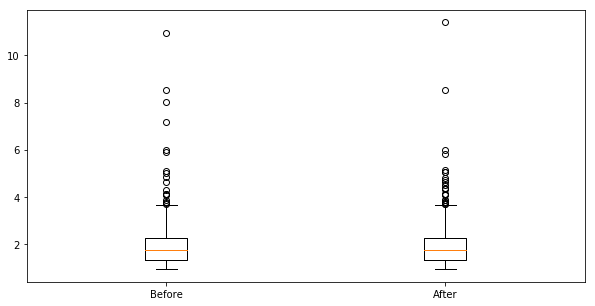

************
OVERHEAD
************
Before
Average overhead is 1.96189483964
Median overhead is 1.7597666537
Variance of overhead is 0.925147951066
************
After
Average overhead is 1.96953942274
Median overhead is 1.74305844375
Variance of overhead is 0.893560351414
************
There is a decrease of trip overhead by 0.949455992777%


In [7]:
%matplotlib inline  
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import mean, median, variance
plt.rcParams['figure.figsize'] = [10, 5]
import pprint
import math

def get_overheads(file_name):
    data = []
    with open(file_name, 'r') as results:
        for line in results:
            line = line.split(",")
            trip_duration = float(line[4])
            overhead = float(line[6])
            agent = line[7]
            preference = line[8].replace('\r', '').replace('\n', '')
            
            data.append(overhead)
    return data

before_csv = "data/overheads-1.csv"
after_csv  = "data/overheads.csv"


overheads_before = get_overheads(before_csv)
overheads_after = get_overheads(after_csv)

overheads = []
overheads.append(overheads_before)
overheads.append(overheads_after)

labels = []
labels.append("Before")
labels.append("After")

plt.figure()
plt.boxplot(overheads, labels=labels)
plt.show()

print("************")
print("OVERHEAD")
print("************")
for i in range(len(overheads)):   
    print("%s" % (labels[i]))
    print("Average overhead is % s" % (mean(overheads[i]))) 
    print("Median overhead is % s" % (median(overheads[i]))) 
    print("Variance of overhead is % s" % (variance(overheads[i]))) 
    print("************")
    

baseline = median(overheads_before)
diff_percentage = ((median(overheads_after) - baseline) / baseline) * 100

print "There is a decrease of trip overhead by " + str(abs(diff_percentage)) + "%"

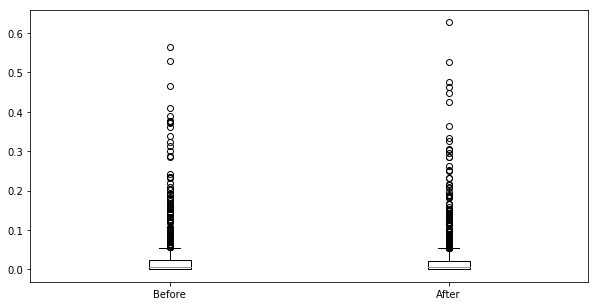

************
STREET UTILIZATION
************
Before
Average street utilization is 0.0247632366721
Median street utilization is 0.00664153652845
Variance of street utilization is 0.00311563359972
************
After
Average street utilization is 0.0244166843404
Median street utilization is 0.00729457198026
Variance of street utilization is 0.00303043210465
************
There is a decrease of street utilization by 2.73464424959%


In [9]:
def get_utilizations(file_name):
    utilizations = []
    line_no = 0
        
    with open(file_name, 'r') as results:
        for line in results:
            line = line.split(",")
            line[len(line)-1] = line[len(line)-1].replace('\r', '').replace('\n', '')
            line_no = line_no + 1
            if line_no == 1:
                edges = line
            else: 
                utilizations.append([float(u) for u in line[1:]])   
    
    streets_data = {}
    for i in range(len(edges)):
        streets_data[edges[i]] = [utilization[i] for utilization in utilizations]

    streets_utilizations = {}
    for key, value in streets_data.iteritems():
        streets_utilizations[key] = mean(value)
    
    return streets_utilizations

before_csv = "data/streets-1.csv"
after_csv  = "data/streets.csv"

streets_before = get_utilizations(before_csv)
streets_after = get_utilizations(after_csv)

streets = []
streets.append(streets_before.values())
streets.append(streets_after.values())

labels = []
labels.append("Before")
labels.append("After")

plt.figure()
plt.boxplot(streets, labels=labels)
plt.show()

print("************")
print("STREET UTILIZATION")
print("************")
for i in range(len(streets)):   
    print("%s" % (labels[i]))
    print("Average street utilization is % s" % (mean(streets[i]))) 
    print("Median street utilization is % s" % (median(streets[i]))) 
    print("Variance of street utilization is % s" % (variance(streets[i]))) 
    print("************")
    
baseline = variance(streets_before.values())
diff_percentage = ((variance(streets_after.values()) - baseline) / baseline) * 100

print "There is a decrease of street utilization by " + str(abs(diff_percentage)) + "%"

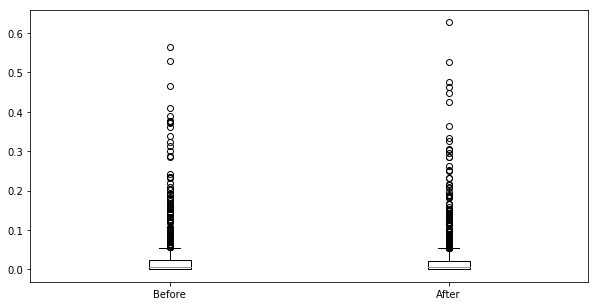

************
LANE WAIT TIMES
************
Before
Average lane wait time is 0.0247632366721
Median lane wait time is 0.00664153652845
Variance of lane wait times is 0.00311563359972
************
After
Average lane wait time is 0.0244166843404
Median lane wait time is 0.00729457198026
Variance of lane wait times is 0.00303043210465
************
There is a decrease of lane wait times by 4.38420008909%


In [11]:
def get_wait_times(file_name):
    wait_times = []
    line_no = 0
        
    with open(file_name, 'r') as results:
        for line in results:
            line = line.split(",")
            line[len(line)-1] = line[len(line)-1].replace('\r', '').replace('\n', '')
            line_no = line_no + 1
            if line_no == 1:
                lanes = line
            else: 
                wait_times.append([float(u) for u in line[1:]])   
    
    wait_times_data = {}
    for i in range(len(lanes)):
        wait_times_data[lanes[i]] = [wait_time[i] for wait_time in wait_times]

    lane_wait_times = {}
    for key, value in wait_times_data.iteritems():
        lane_wait_times[key] = mean(value)
    
    return lane_wait_times

before_csv = "data/waits-1.csv"
after_csv  = "data/waits.csv"

waits_before = get_wait_times(before_csv)
waits_after  = get_wait_times(after_csv)

waits = []
waits.append(waits_before.values())
waits.append(waits_after.values())

labels = []
labels.append("Before")
labels.append("After")

plt.figure()
plt.boxplot(streets, labels=labels)
plt.show()

print("************")
print("LANE WAIT TIMES")
print("************")
for i in range(len(waits)):   
    print("%s" % (labels[i]))
    print("Average lane wait time is % s" % (mean(streets[i]))) 
    print("Median lane wait time is % s" % (median(streets[i]))) 
    print("Variance of lane wait times is % s" % (variance(streets[i]))) 
    print("************")
    
baseline = variance(waits_before.values())
diff_percentage = ((variance(waits_after.values()) - baseline) / baseline) * 100

print "There is a decrease of lane wait times by " + str(abs(diff_percentage)) + "%"